In [42]:
import torch
import torch.nn as nn
import torch.optim as optim # 导入优化器
from torchvision import datasets, transforms # 导入datasets数据集类  transforms 图像变换类
from torch.utils.data import DataLoader # 数据加载类
import os

# 设置随机种子
torch.manual_seed(21)

# 定义数据预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 确保图像大小一致
    transforms.Grayscale(1),  # 强制灰度图像（1通道）
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 标准化图像数据
])

# 加载训练和测试数据集
train_dataset = datasets.ImageFolder(root='./FashionMNIST_images/train', transform=transform)  # 训练集
test_dataset = datasets.ImageFolder(root='./FashionMNIST_images/test', transform=transform)  # 测试集

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # 训练集
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # 测试集

# 定义神经网络模型
class QYNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)   # 第一个全连接层
        self.fc2 = nn.Linear(128, 10)   # 第二个全连接层，输出10个类别

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # 展平数据，方便进行全连接
        x = torch.relu(self.fc1(x))  # 使用ReLU激活函数
        x = self.fc2(x)  # 输出层
        return x

# 检查是否有 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 初始化模型
model = QYNN().to(device)  # 将模型移到 GPU 或 CPU 上

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 优化器

# 训练模型
epochs = 2
best_acc = 0.0  # 初始化最佳准确率
best_model_wts = None  # 用于保存最佳权重

for epoch in range(epochs):
    running_loss = 0.0  # 定义初始loss为0
    model.train()  # 设置模型为训练模式
    for inputs, labels in train_loader:
        # 移动数据到 GPU 或 CPU
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 梯度清零
        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新模型参数
        running_loss += loss.item()  # 累加损失

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

    # 验证模型性能
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 不需要计算梯度
        for inputs, labels in test_loader:
            # 移动数据到 GPU 或 CPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # 获取输出
            _, predicted = torch.max(outputs, 1)  # 获取最大概率的索引
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total  # 计算准确率
    print(f"Epoch {epoch+1}/{epochs}, Accuracy on test set: {accuracy:.2%}")

    # 如果当前模型的准确率比之前的最佳准确率好，则保存模型权重
    if accuracy > best_acc:
        best_acc = accuracy
        best_model_wts = model.state_dict()  # 保存最佳模型的权重

# 保存最佳权重
torch.save(best_model_wts, 'best_model2.pth')
print("Best model weights saved.")


Epoch 1/2, Loss: 0.7981
Epoch 1/2, Accuracy on test set: 79.11%
Epoch 2/2, Loss: 0.5209
Epoch 2/2, Accuracy on test set: 81.08%
Best model weights saved.


# 推理可视化


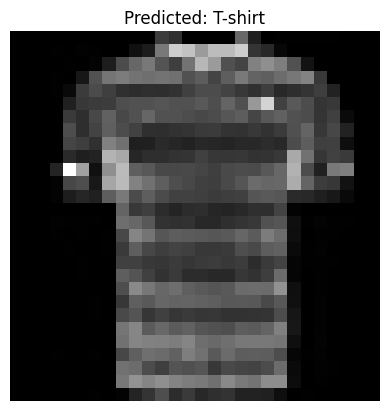

In [51]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

# 定义类别
classes = ['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirt', 'Trouser']

model = QYNN()
model.load_state_dict(torch.load(r'D:\code\Pytorch\best_model2.pth'))
model.eval()

# 定义推理和可视化函数
def infer_and_visualize_image(image_path, model, classes):
    # 打开图像并进行预处理
    img = Image.open(image_path).convert('L')  # 确保是灰度图像
    img = transform(img).unsqueeze(0)  # 增加一个批次维度

    # 推理
    with torch.no_grad():
        output = model(img)
        _, predicted = torch.max(output, 1)

    # 可视化图像和预测结果
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted: {classes[predicted.item()]}")
    plt.axis('off')
    plt.show()

# 输入图像路径
image_path = r"D:\code\Pytorch\FashionMNIST_images\test\T-shirt\top\test_35.png"

# 推理并可视化
infer_and_visualize_image(image_path, model, classes)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# 设置随机种子
torch.manual_seed(21)

# 定义数据预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 确保图像大小一致
    transforms.Grayscale(1),  # 强制灰度图像（1通道）
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 标准化图像数据
])

# 加载训练和测试数据集
train_dataset = datasets.ImageFolder(root='./FashionMNIST_images/train', transform=transform)  # 训练集
test_dataset = datasets.ImageFolder(root='./FashionMNIST_images/test', transform=transform)  # 测试集

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # 训练集  batch=64
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # 测试集
# 打印数据集大小和样本检查
print(f"训练集大小: {len(train_loader.dataset)}") # 60000
print(f"测试集大小: {len(test_loader.dataset)}")  # 10000

训练集大小: 60000
测试集大小: 10000


In [ ]:
# 定义神经网络模型
class QYNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)   # 第一个全连接层
        self.fc2 = nn.Linear(128, 10)   # 第二个全连接层，输出10个类别

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # 展平数据，方便进行全连接
        x = torch.relu(self.fc1(x))  # 先经过第一个全连接层，再使用ReLU激活函数
        x = self.fc2(x)  # 输出层
        return x

# 检查是否有 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 初始化模型
model = QYNN().to(device)  # 将模型移到 GPU 或 CPU 上

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 优化器 随机梯度下降 学习率为0.01

# 训练模型
epochs = 10
best_acc = 0.0  # 初始化最佳准确率
best_model_wts = None  # 用于保存最佳权重

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0  # 定义初始loss为0
    model.train()  # 设置模型为训练模式
    for inputs, labels in train_loader:
        # 移动数据到 GPU 或 CPU
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 梯度清零
        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新模型参数
        running_loss += loss.item()  # 累加损失  i += 1  i = i+1

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

    # 验证模型性能
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 不需要计算梯度
        for inputs, labels in test_loader:
            # 移动数据到 GPU 或 CPU
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # 获取输出
            _, predicted = torch.max(outputs, 1)  # 获取最大概率的索引
            total += labels.size(0) # 获取当前批次样本数量
            correct += (predicted == labels).sum().item() # 对预测对的值进行累加 

    accuracy = correct / total  # 计算准确率
    print(f"Epoch {epoch+1}/{epochs}, Accuracy on test set: {accuracy:.2%}")

    # 如果当前模型的准确率比之前的最佳准确率好，则保存模型权重
    if accuracy > best_acc:
        best_acc = accuracy
        best_model_wts = model.state_dict()  # 保存最佳模型的权重

# 保存最佳权重
torch.save(best_model_wts, 'best_model.pth')
print("Best model weights saved.")
